# German Credit risk ML

## Step 1: Reading the data 

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [13]:
file_ds = r'C:\Users\andre\Desktop\Machine_Learning_Research\german.data'
# read data and change label names
df = pd.read_csv(file_ds,encoding='ISO-8859-1',sep=' ', header=None, names=['checkingstatus','duration','history','purpose','amount','savings','employ','installment','status','others','residence','property','age','otherplans','housing','cards','job','liable','tele','foreign','GoodCredit'])

df.head()

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,GoodCredit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Target variable: GoodCredit
1 - loan is a good decision
0 - not a good decision

Modelo supervisado: los datos q estamos testaeando son dados al model

# Step 2: Explore data

To understand overall data

Assess if each column affect the values of the target variable

In [15]:
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
# compare non-null numbers vs total rows
df.info() #summarized info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   checkingstatus  1000 non-null   object
 1   duration        1000 non-null   int64 
 2   history         1000 non-null   object
 3   purpose         1000 non-null   object
 4   amount          1000 non-null   int64 
 5   savings         1000 non-null   object
 6   employ          1000 non-null   object
 7   installment     1000 non-null   int64 
 8   status          1000 non-null   object
 9   others          1000 non-null   object
 10  residence       1000 non-null   int64 
 11  property        1000 non-null   object
 12  age             1000 non-null   int64 
 13  otherplans      1000 non-null   object
 14  housing         1000 non-null   object
 15  cards           1000 non-null   int64 
 16  job             1000 non-null   object
 17  liable          1000 non-null   int64 
 18  tele     

In [78]:
df.describe(include='all')

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,GoodCredit
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,0.700000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,1.000000


In [80]:
df.head(10)

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,GoodCredit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,0


In [56]:
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
GoodCredit          2
dtype: int64

age, duration, amount - continuous 

In [61]:
df['GoodCredit'].value_counts()

1    700
0    300
Name: GoodCredit, dtype: int64

## 2.1 Visual Exporatory Data Analysis

In [20]:
# Categorical variables: Bar plot
# Continuous variables: Histogram

import matplotlib.pyplot as plt

In [69]:
#function to create plots for each categorical variable
# Typically a categorical variable contains less than 20 Unique values
#AND there is repetition of values, which means the data can be grouped by those unique values.
#graphs for variable vs frequency

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

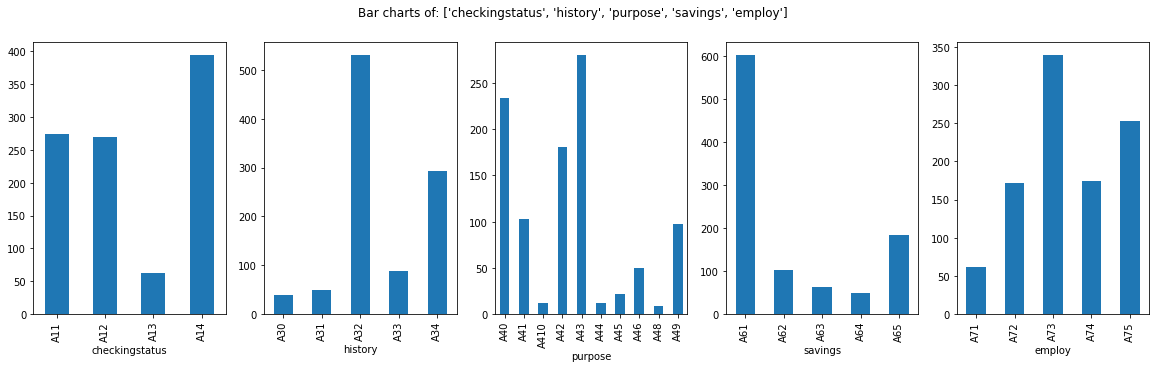

In [71]:
PlotBarCharts(inpData=df, 
              colsToPlot=['checkingstatus', 'history', 'purpose','savings','employ'])

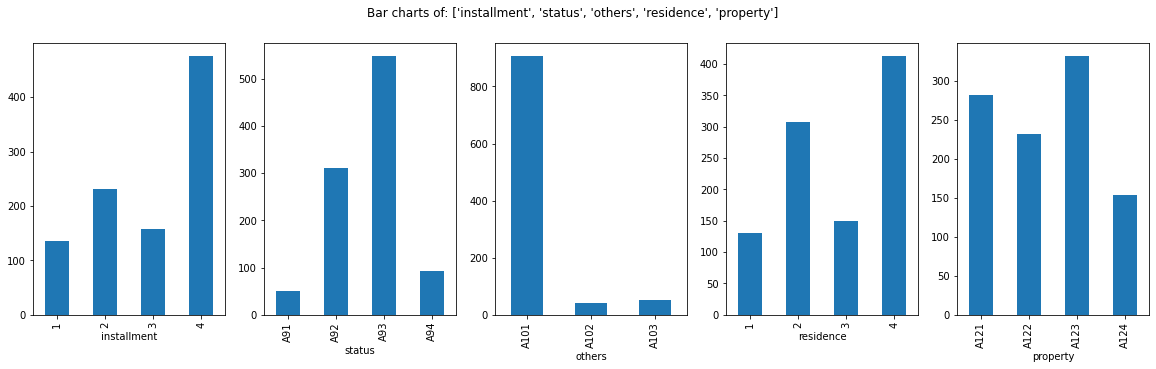

In [73]:
PlotBarCharts(inpData=df, 
              colsToPlot=['installment', 'status', 'others','residence', 'property'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

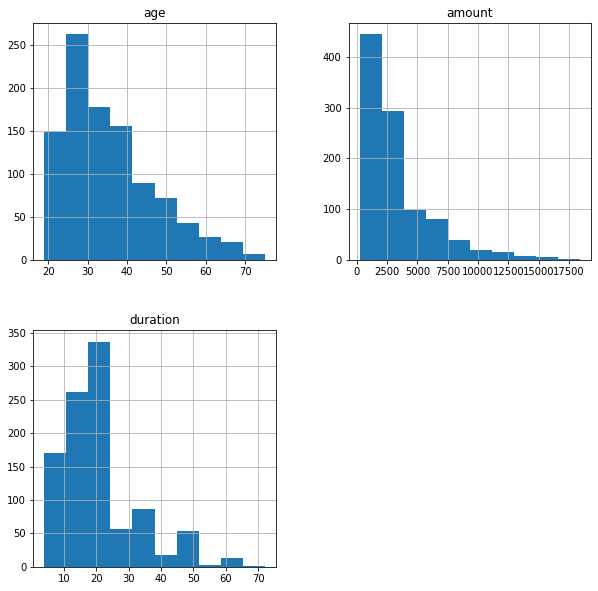

In [74]:
#histograms for continuous vairables
# histograms show value of vairable vs umber of values in that range (frequency?)
df.hist(['age', 'amount','duration'], figsize=(10,10))

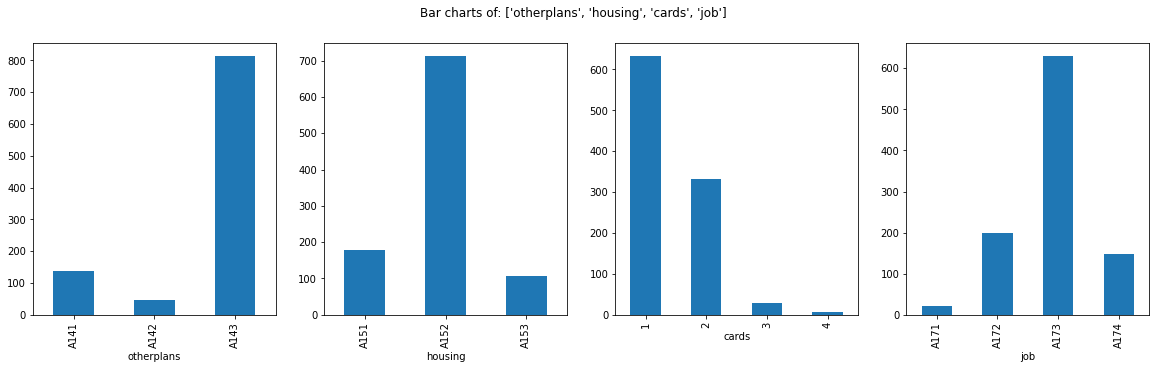

In [76]:
PlotBarCharts(inpData=df, 
              colsToPlot=['otherplans', 'housing', 'cards', 'job'])

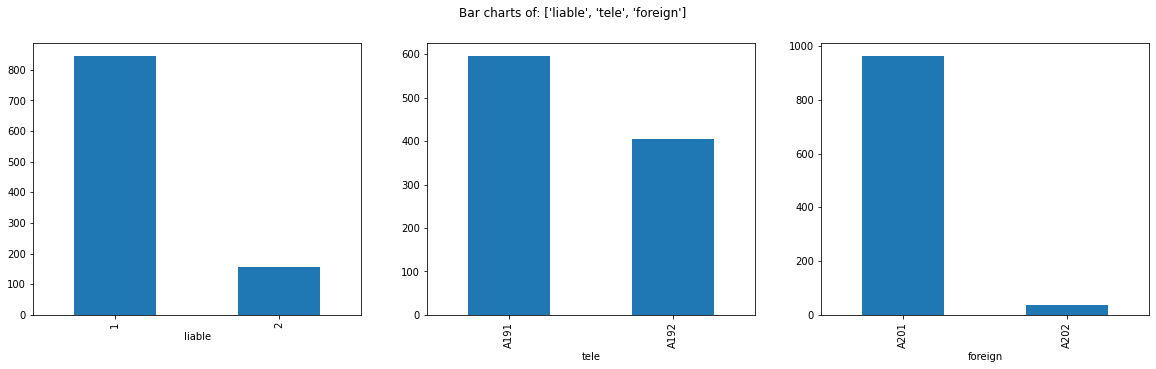

In [77]:
PlotBarCharts(inpData=df, 
              colsToPlot=['liable', 'tele', 'foreign'])

In [26]:
# Finding how many missing values are there for each column
df.isnull().sum()

checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
GoodCredit        0
dtype: int64

# Feature Selection

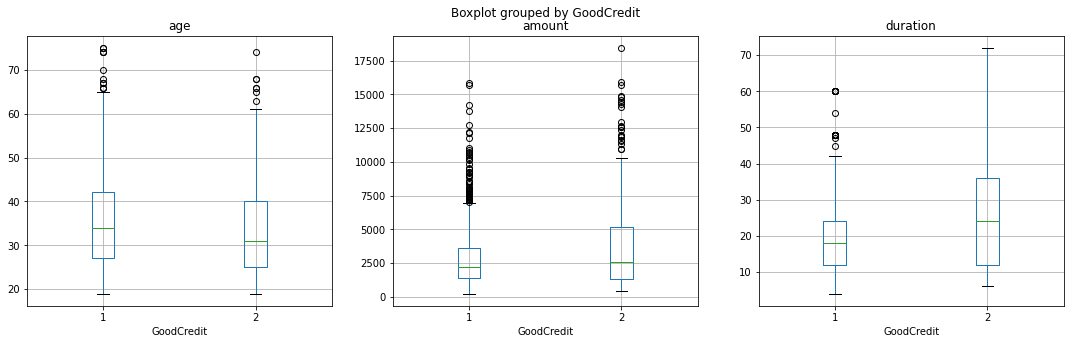

In [30]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

Grouped Bar Chart: Categorical vs Categorical

In [33]:
#These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
#If the ratio of bars is similar across all categories, then the two columns are not correlated.

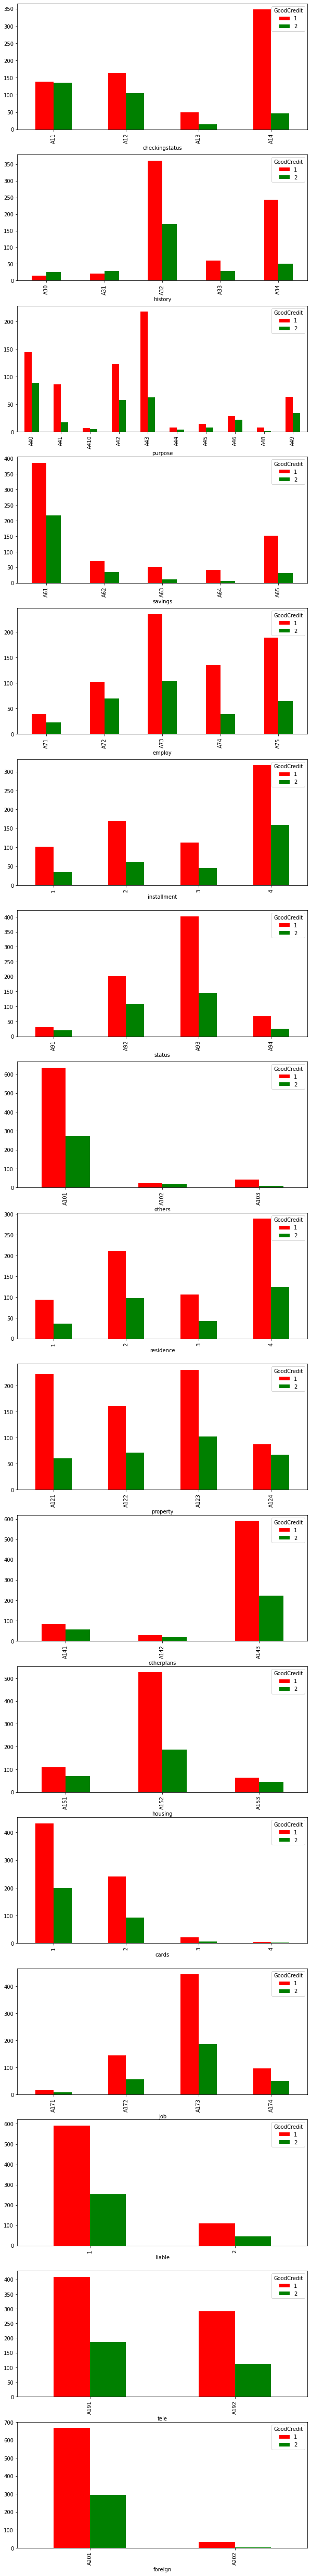

In [37]:
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

# Selecting final predictors for Machine Learning¶

Based on the above tests, selecting the final columns for machine learning

In [38]:
SelectedColumns=['checkingstatus','history','purpose','savings','employ',
 'status','others','property','otherplans','housing','foreign',
 'age', 'amount', 'duration']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


## Step 3: Prepare Data

In [47]:
# 1 is true and 0 is false
df['GoodCredit'].replace({2:0}, inplace=True)
#df[df['goodcredit']==2] =0

#visualiza variables categorica en un bar chart y las numericas en un histograma
# df['GoodCredit'].replace({2:0})


In [49]:
SelectedColumns=['checkingstatus','history','purpose','savings','employ','status','others','property','otherplans','housing','foreign','age', 'amount', 'duration']

DataForML = df[SelectedColumns]
DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
DataForML['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

#adding target variable into the data
DataForML_Numeric['GoodCredit']=df['GoodCredit']

# Printing sample rows
DataForML_Numeric.head()


C:\Users\andre\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,employ,foreign,age,amount,duration,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,GoodCredit
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


## Paso 4: Training the Model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [63]:
len(X_train)

800

In [64]:
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

Evaluate results of model

In [65]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
#cuando el logaritmo nos dice q es un buen pagador, acierta un 87%
#confusion matrix - 

              precision    recall  f1-score   support

           0       0.61      0.48      0.54        58
           1       0.81      0.87      0.84       142

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.75      0.76      0.75       200

[[ 28  30]
 [ 18 124]]


In [55]:
#Precision: What proportion of positive identifications was actually correct?
#Recall: What proportion of actual positives was identified correctly?
#F1-score is the harmonic mean of precision and recall. It combines precision and recall into a single number. What percent of positive predictions were correct?
#The higher the precision and recall, the higher the F1-score. The closer it is to 1, the better the model.
#support is the number of actual occurrences of the class in the specified dataset

#When our algorithm predicts, it si correct 62% of times when predicting for bad payers and 81% for good payers
#This algorithm correctly identifies 50% of bad payers and 87% of good payers

#https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

In [67]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

C:\Users\andre\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\andre\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)



Accuracy values for 10-fold Cross Validation:
 [0.77781287 0.68       0.72238245 0.73549151 0.76028751 0.82631579
 0.63522013 0.78407524 0.78113208 0.77519841]

Final Average Accuracy of the model: 0.75


In [ ]:
#look for fairness metrics for ML models
# push to github and share repo
#